In [1]:
%load_ext autoreload
%autoreload 2


# CW/CCW vertex colourings

We are trying to look at how degenerate colourings can be described in terms of clockwise and anticlockwise colourings of the vertices. Start with a lattice

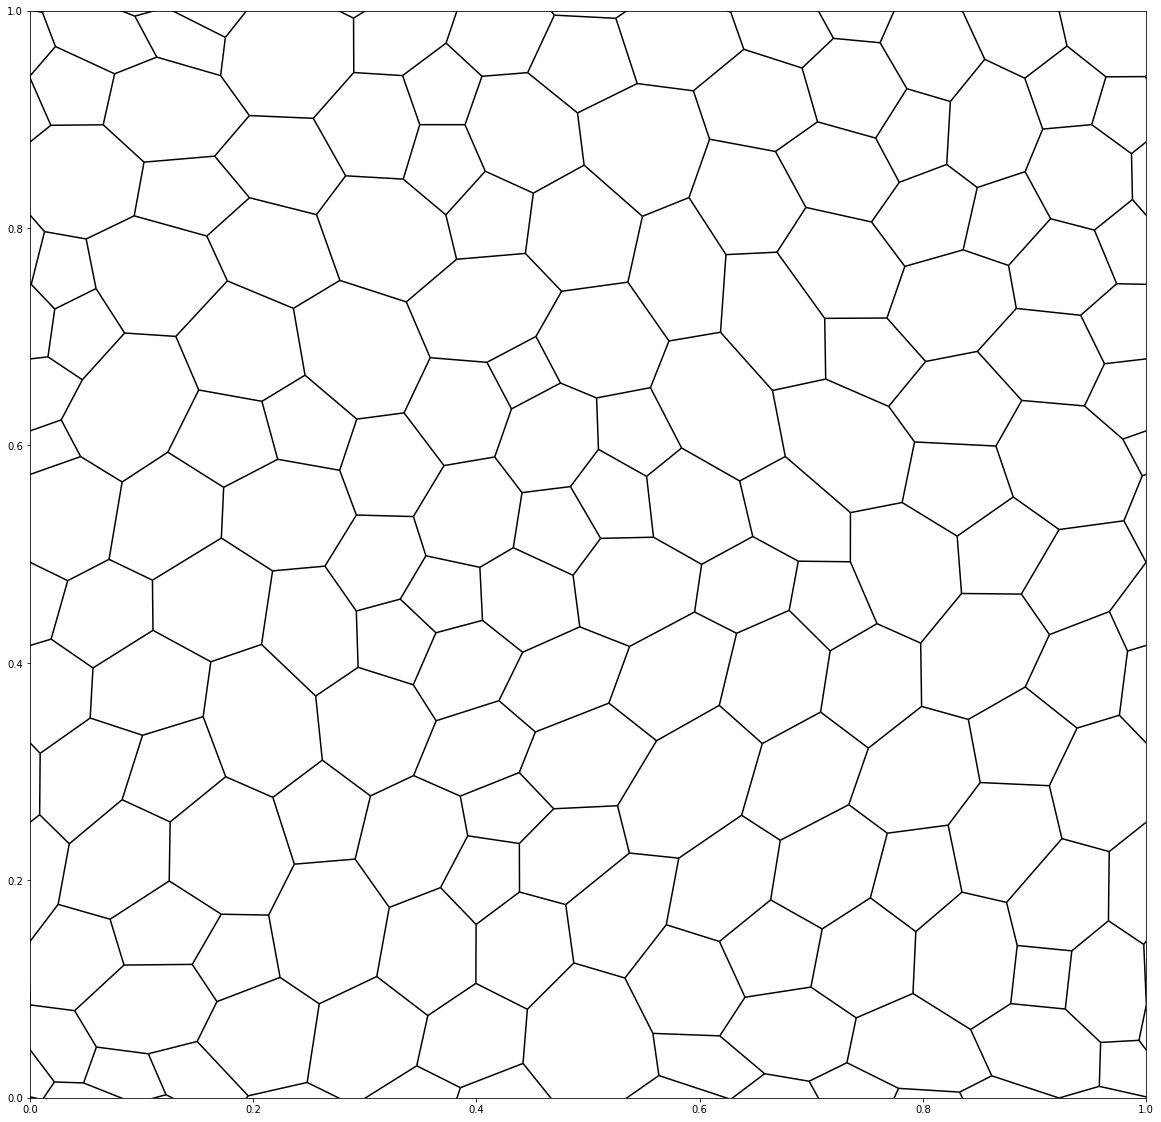

Lattice(298 vertices, 447 edges, 149 plaquettes)

In [2]:

import numpy as np
from matplotlib import pyplot as plt
from koala.pointsets import *
from koala.voronization import generate_lattice
from koala import plotting as pl

n_centers_along_axes = 15


centers = generate_bluenoise(30,n_centers_along_axes,n_centers_along_axes)
# centers = generate_random(50)
lattice = generate_lattice(centers,shift_vertices=True)
fig, ax = plt.subplots(1,1,figsize = (20,20))
pl.plot_lattice(lattice, ax= ax )
plt.show()
lattice

In [3]:
from koala.graph_utils import clockwise_edges_about
n_colourings_to_find = 3


ordered_edge_indices = clockwise_edges_about(vertex_i = 0, g=lattice)

from koala import graph_color
adj = lattice.edges.indices
a,edge_colourings = graph_color.edge_color(
    adj,
    n_solutions=n_colourings_to_find,
    fixed= enumerate(ordered_edge_indices))

In [4]:
# find edge colourings
def find_parity(input_colours):
    p = 2 - (input_colours[2] - input_colours[0])%3 
    return p

point_colourings = edge_colourings[:,np.array(lattice.vertices.adjacent_edges)]
vertex_colourings = np.apply_along_axis(find_parity,2,point_colourings)

Here we can check that the vertex colouring does actually correspond to the correct orientation in terms of edge colourings

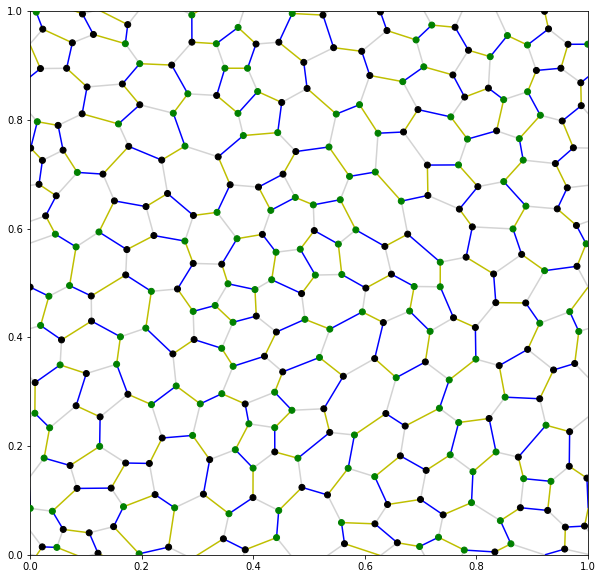

In [5]:
colouring_to_plot = 0

fig, ax = plt.subplots(1,1,figsize = (10,10))
pl.plot_lattice(
    lattice, 
    ax= ax ,
    edge_labels=edge_colourings[colouring_to_plot],
    vertex_labels= vertex_colourings[colouring_to_plot], 
    edge_color_scheme=['lightgrey', 'y', 'b','lightgrey'], 
    vertex_color_scheme=['g','k'])
plt.show()

Text(0.5, 1.0, 'original colouring')

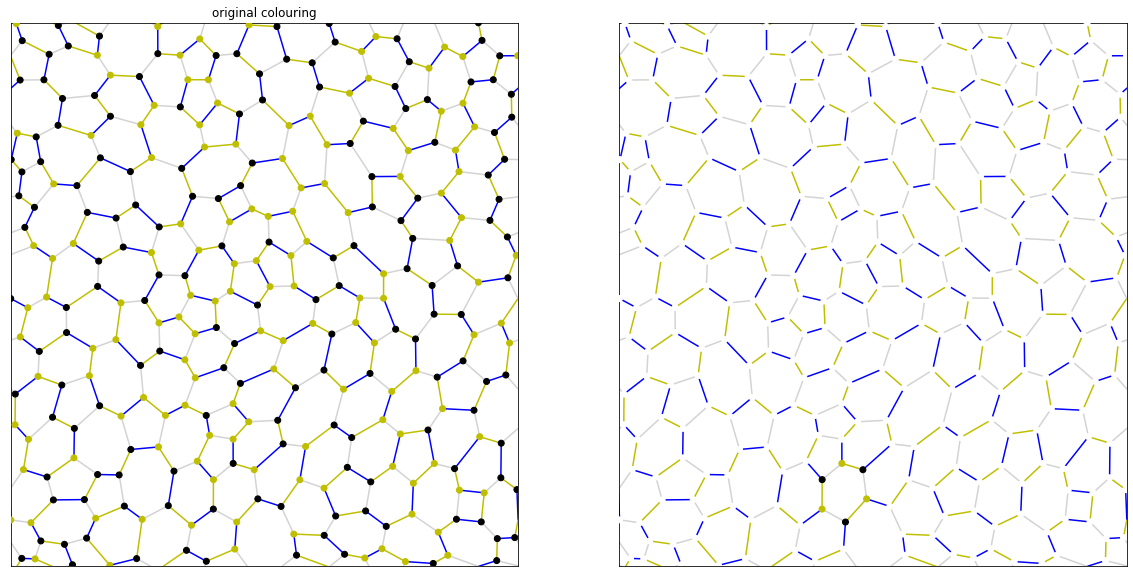

In [6]:
comparison_index = 0
figure_dimension = 10


def compare_to_zero(row_to_compare):
    reference = vertex_colourings[comparison_index]
    row_mask = row_to_compare != reference
    # print(row_mask)


    return row_mask*(row_to_compare) -(1-row_mask)

vertex_diff = np.apply_along_axis(compare_to_zero, 1, vertex_colourings)
vertex_diff[0] = vertex_colourings[0]

fig2, axes2 = plt.subplots(int(n_colourings_to_find/2),2,figsize = figure_dimension*(np.array([2,int(n_colourings_to_find/2)])))
for ax in axes2.flatten():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

n = 0
for ax, colouring in zip(axes2.flatten(), vertex_diff):
    if n == 0:
        pl.plot_lattice(
        lattice, 
        ax= ax ,
        edge_labels=edge_colourings[colouring_to_plot],
        vertex_labels= colouring, 
        edge_color_scheme=['lightgrey', 'y', 'b','lightgrey'],
        vertex_color_scheme=['y','k','w'])
    else:
        pl.plot_lattice(
        lattice, 
        ax= ax ,
        edge_labels=edge_colourings[colouring_to_plot],
        vertex_labels= colouring, 
        edge_color_scheme=['lightgrey', 'y', 'b','lightgrey'], 
        vertex_color_scheme=['y','k','w'])
    n +=1

axes2[0].set_title('original colouring')


<AxesSubplot:>

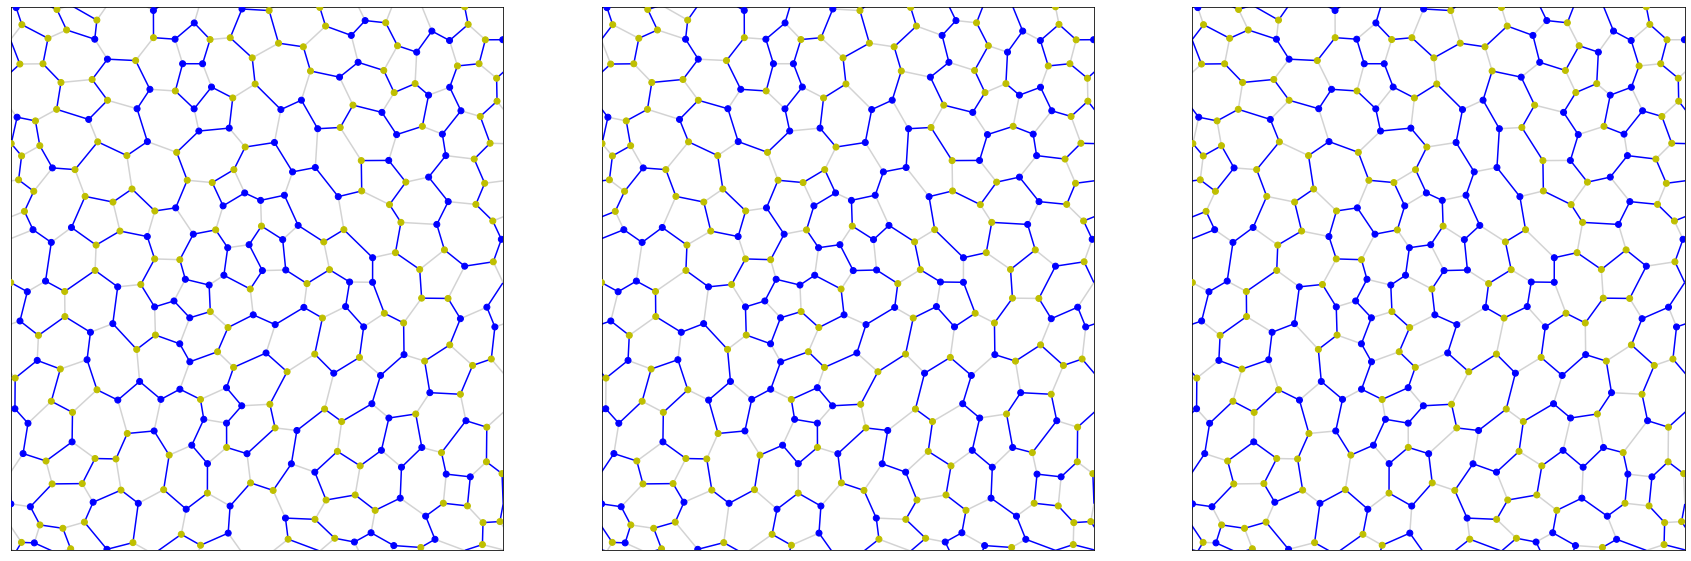

In [7]:
fig3, axes3 = plt.subplots(1,3,figsize = (30,10))
for ax in axes3.flatten():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

number = 0
pl.plot_lattice(
lattice, 
ax= axes3[0] ,
edge_labels=edge_colourings[colouring_to_plot],
edge_color_scheme=['lightgrey', 'b', 'b','lightgrey'],
vertex_labels= vertex_diff[number],
vertex_color_scheme=['b', 'y', 'w'])

pl.plot_lattice(
lattice, 
ax= axes3[1] ,
edge_labels=edge_colourings[colouring_to_plot],
edge_color_scheme=['b', 'lightgrey', 'b','lightgrey'],
vertex_labels= vertex_diff[number],
vertex_color_scheme=['b', 'y', 'w'])

pl.plot_lattice(
lattice, 
ax= axes3[2] ,
edge_labels=edge_colourings[colouring_to_plot],
edge_color_scheme=['b', 'b', 'lightgrey','lightgrey'],
vertex_labels= vertex_diff[number],
vertex_color_scheme=['b', 'y', 'w'])
